<img style="float: left; margin-bottom: 1em" src="images/excelerate.png" width="200">
<img style="float: right; margin-bottom: 1em" src="images/surfsara.png" width="150">
<hr style="clear: both"/>

# Hyperparameter tuning
In this notebook you will learn how the different hyperparameters affect the performance of your network.

We have prepared a more complicated problem for you and turned the original two-class classification problem (healthy versus diseased leafs) into a ten-class classification problem. All pictures are taken from tomato plants. Let's load the data set, and display the class names.

In [1]:
import lib

X, Y, labels = lib.dataset_plant_village_tomato()

for index, name in enumerate(labels):
    print('{}: {}'.format(str(index).rjust(2), name))

Using TensorFlow backend.


 0: bacterial-sport
 1: early-blight
 2: late-blight
 3: leaf-mold
 4: septoria-spot
 5: spider-mites
 6: target-spot
 7: yellowleaf-curl-virus
 8: mosaic-virus
 9: healthy


As you can see, we have one healthy class, and nine disease classes.

Let's plot the first 32 examples in the data set:

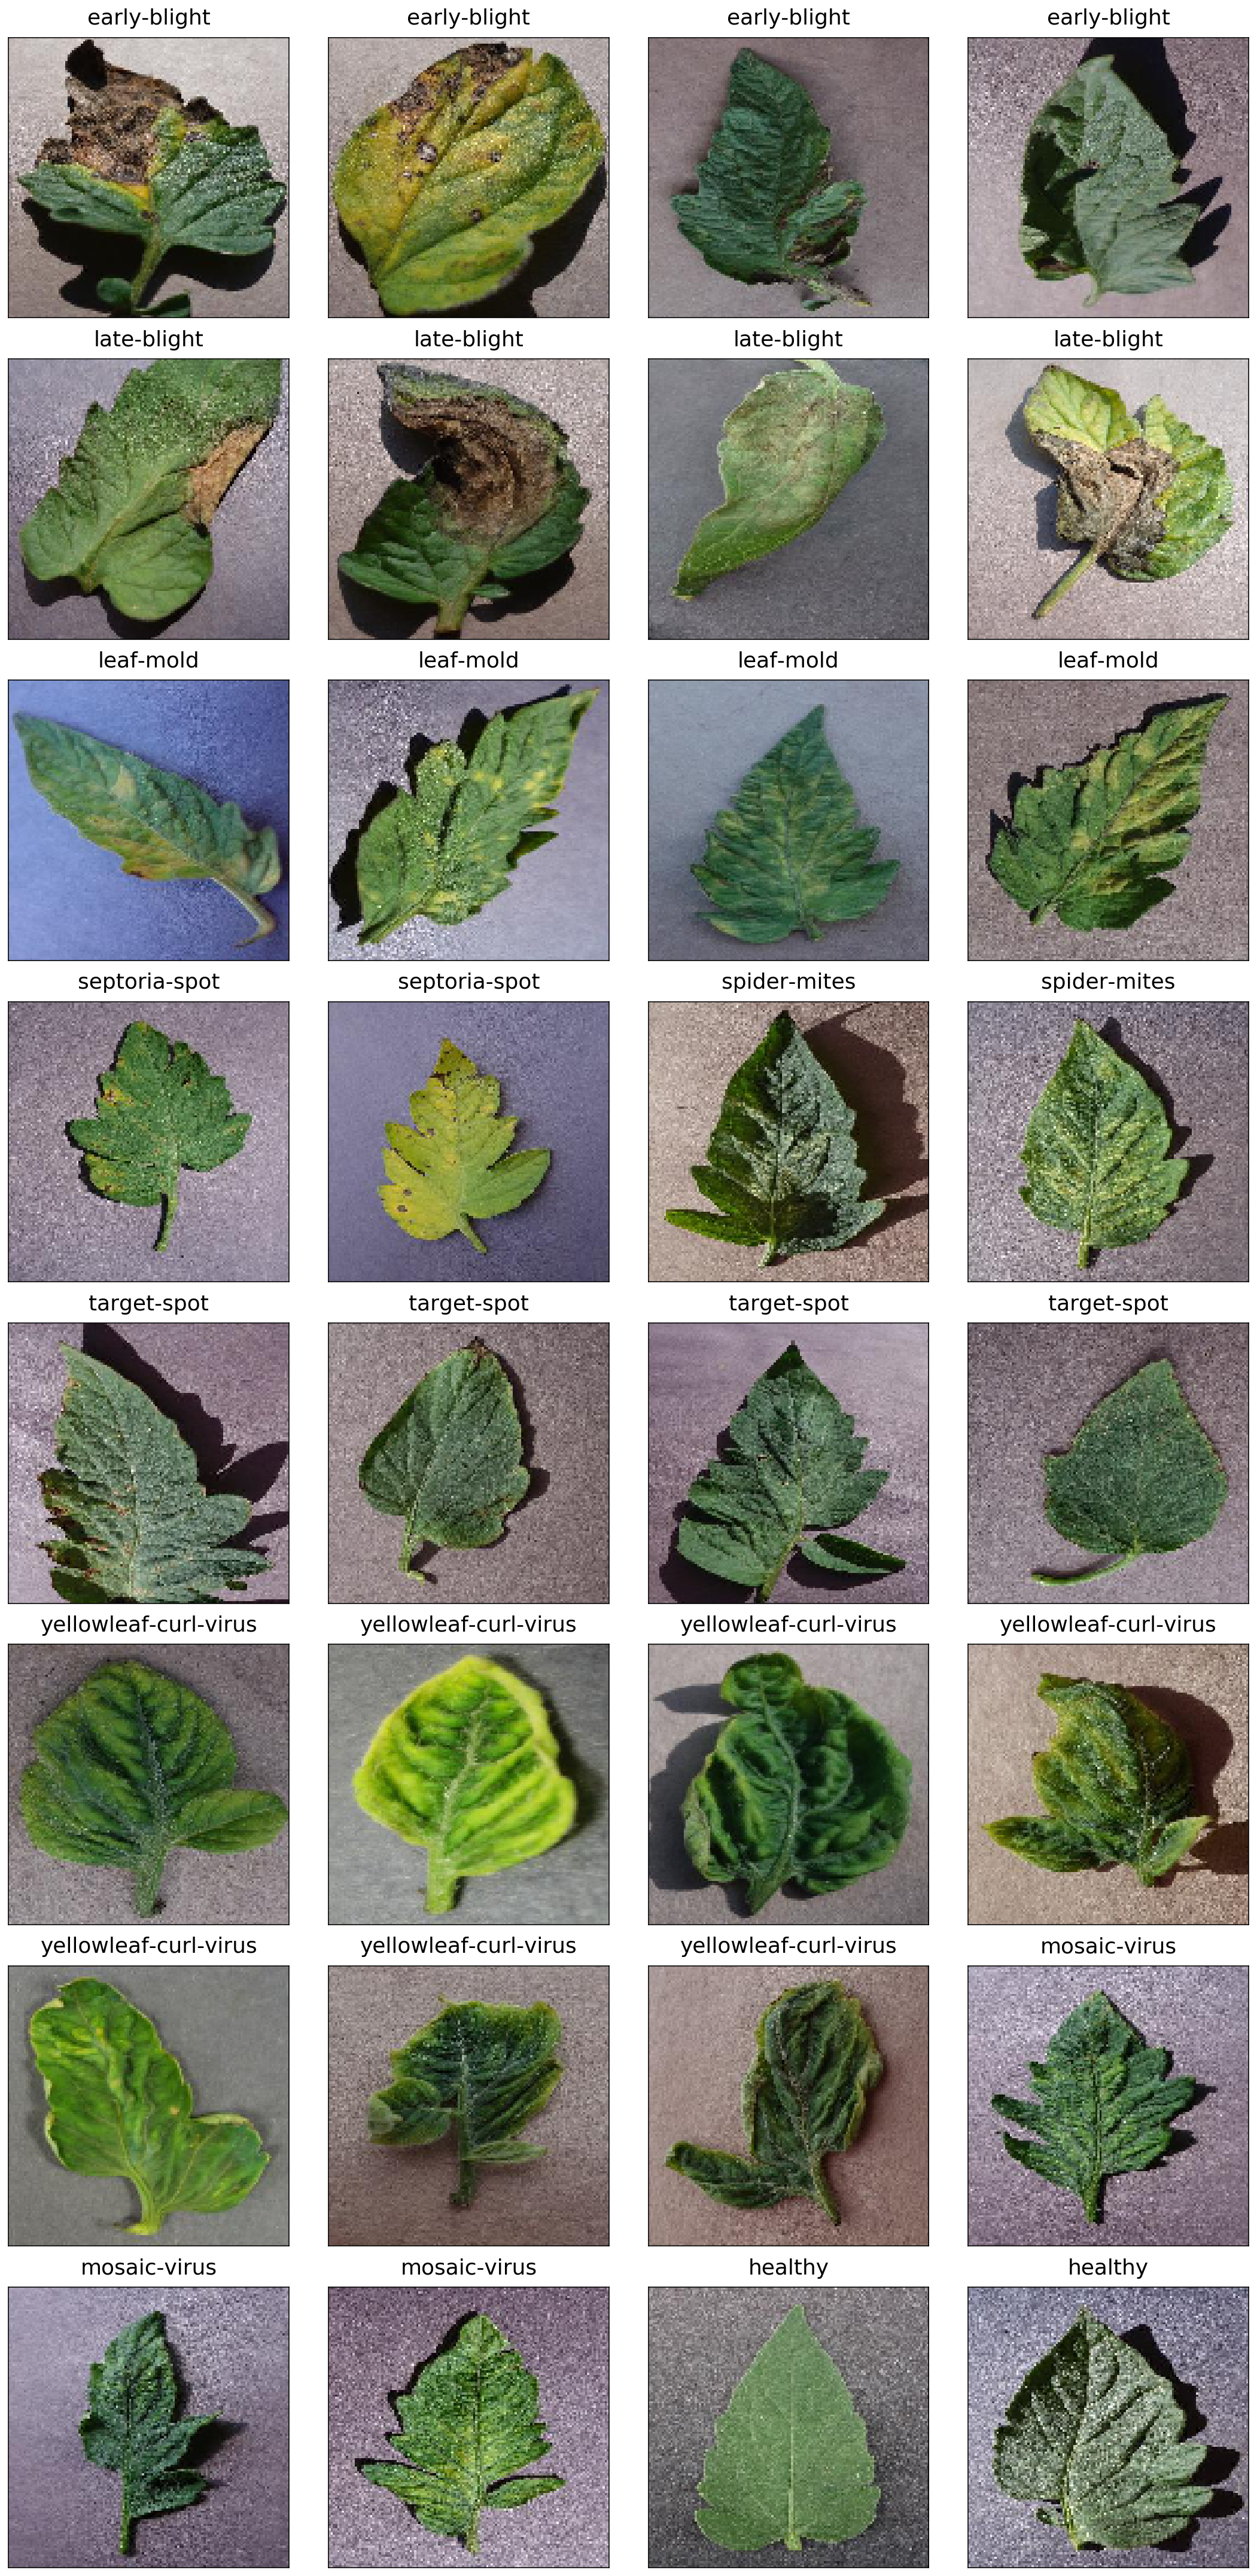

In [2]:
%config InlineBackend.figure_format = 'retina'

lib.plot_examples(X[:32], Y[:32], labels);

Let's inspect the size of the inputs `X` and `Y` using numpy's [`shape`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) function:

In [3]:
print('Shape of input images X: {}'.format(X.shape))
print('Shape of input labels Y: {}'.format(Y.shape))

Shape of input images X: (6367, 128, 128, 3)
Shape of input labels Y: (6367, 10)


## Exercise 1
What is the size (width and height) of the examples, in pixels? How many examples do we have?

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: the dimensions of the images are 128 by 128 pixels, with three colour channels. We have 6367 examples (the first dimension of the data set).

Let's have a look at how our labels look like. The next cell will display the labels of the first 10 examples:

In [ ]:
Y[:10]

## Exercise 2
How many examples in the first 10 are suffering from late blight? How many are healthy? Write down your answer in the cell below.

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: late blight is class index 2 (see the first code cell where we load the data), meaning the third column (we start counting at 0). We count two 1's in the third column of Y.

Similary, for healthy (class index 9, column 10), we have 0 examples.

## Exercise 3
Implement a model with a single dense hidden layer with 64 units and ReLU activation by filling out the skeleton below.

**Hints**:
* Go back to the slides to find out the activation functions you will need in the hidden and output layers.
* It may help to keep open the first notebook for reference purposes.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
# <FILL IN>
model.add(Dense(10, activation='softmax'))
model.summary()

In [2]:
# SOLUTION

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 3,146,442
Trainable params: 3,146,442
Non-trainable params: 0
_________________________________________________________________


## Exercise 4
How many parameters do we have in the first dense layer, and why? How many do we have in the output layer, and why? Write down your answer in the cell below.

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: we have 3.145.792 parameters in the first dense layer (our hidden layer). Each unit in that layer has 49.152 incoming connections (the flattened 128 x 128 x 3 image), plus a single bias term. Hence, for 64 units we have 64 * (49.152 weight parameters + 1 bias parameter) = 64 * 49.153 = 3.145.792 parameters in total.

## Exercise 5
Initialise the Adam optimizer with a learning rate of 0.1 and train the network for 10 epochs by filling out the skeleton below.

Does the network train at all? Why or why not, do you think? Fill in your answer in the cell below.

**Hint**: what would the accuracy be like when we always predict the same class in a ten-class classification problem?

In [3]:
from keras.optimizers import Adam

model.compile(Adam(lr=0.1), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25


KeyboardInterrupt: 

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: the loss stays exactly the same, meaning the network does not train at all.

The classes are slightly imbalanced, such that we do not have 10% examples per class in our data set. Still, if the network would always predict one of the classes no matter the input, we would have an accuracy of around 0.1. The accuracy reported by Keras is 0.1046, which suggests that the network is doing exactly that.

This is a common occurrence when you have a learning rate that is either too high or too low. The only way to deal with this problem is to modify the learning rate and retrain the model.

## Exercise 6
Experiment with the learning rate by changing it in orders of magnitudes (e.g. 0.1, 0.01, 0.001) in the cell below. We have filled out the network definition and number of epochs for you.

What seems to be a good learning rate for this problem? What happens if you make the learning rate too small? Why? Fill in your answer in the cell below.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=<FILL IN>), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25, batch_size=128)

In [9]:
# SOLUTION

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 3,146,442
Trainable params: 3,146,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
6367/6367 [==============================] - 1s 227us/step - loss: 2.2164 - acc: 0.1907
Epoch 2/25
6367/6367 [==============================] - 1s 163us/step - loss: 2.0459 - acc: 0.2862
Epoch 3/25
6367/6367 [==============================] - 1s 163us/step - loss: 1.9206 - acc: 0.3658
Epoch 4/25
6367/6367 [==============================] - 1s 163us/step - loss: 1.8314 - acc: 0.3928


In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: a learning rate of 0.00001 seems to work quite well. A higher learning rate, 0.0001 converges depending on how lucky you are with the optimisation, but the training can stall like it did in exercise 5. Higher learning rates like 0.001 generally do not converge at all.

Very low learning rates, like 0.0000001, still work, but improve the loss very slowly. The Adam optimiser is quite forgiving with respect to the learning rate you specify since it has its own techniques for moving the training forward. Other optimisers may not be as friendly. In general you typically want to see some significant improvements in the first 25 iterations, which is why a learning rate of 0.00001 with an accuracy of ~0.60 at epoch 25, seems reasonable.

## Validation set
We will now introduce a **validation set** into our problem to verify our network and optimizer configuration. This is as simple as providing the Keras [`fit`](https://keras.io/models/sequential/#fit) function with an argument for its `validation_split` parameter. This parameter governs what proportion of the original data set is set aside for validation during training. After each epoch, Keras will run the validation set through the network to obtain the validation loss and accuracy for that epoch.

## Exercise 7
In the following cell we have set this parameter to 0.2, so that 20% of our original data is used for validation. Fill out the network by adding three hidden layers: the first with 1024 units, the second with 512, and the third with 256. All should have ReLU activation.

Train the network for 50 epochs with learning rate 0.00001 and batch size 256 (the `batch_size` parameter). Inspect the resulting accuracy and loss curves. How do you explain the divergence between the training and validation loss and accuracy?

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
<FILL IN>
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=<FILL IN>), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=<FILL IN>, batch_size=<FILL IN>, validation_split=0.2)
lib.plot_history(history);

In [6]:
# SOLUTION

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=250, batch_size=128, validation_split=0.2)
lib.plot_history(history);

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              50332672  
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 50,991,370
Trainable params: 50,991,370
Non-trainable params: 0
_________________________________________________________________
Train on 5093 samples, validate on 1274 samples
Epoch 1/250
5093/5093 [==============================] - 5s 998us/step - loss: 2.0

KeyboardInterrupt: 

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: training and validation loss both decrease until a certain epoch. After that 

## Bonus exercise (hard)
Play around with the `batch_size` parameter of the network in the previous cell. What happens with the training speed and network convergence compared with the previous example? Why? Fill in your answer in the cell below.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=50, batch_size=4, validation_split=0.2)
lib.plot_history(history);

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: higher batch sizes reduce the training time of the network. That is: more epochs in a fixed amount of time. The disadvantage is that the training process converges more slowly. Hence, there is a trade-off between training speed and rate of convergence. In general, a batch size of 32 seems to be a good balance, but depending on your data set and optimiser you may need to tweak this hyperparameter.